In [60]:
import sys

sys.path.append('../scripts')

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessing

In [135]:
import importlib

importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/mohammedenbah/Desktop/ML Projects/car-price-prediction-project/notebooks/../scripts/preprocessing.py'>

# EDA
## 1. Initial Data Understanding

#### . Data Loading and Inspection
#### . Data Types
#### . Missing Values
#### . Duplicates

In [100]:
df = pd.read_csv('../data/raw/car_price_prediction.csv')

In [101]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [103]:
df.shape

(19237, 18)

In [104]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [105]:
df.duplicated().sum()

313

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
df.drop(columns=['ID' , 'Doors'] , inplace=True)

# 2. Basic Statistical Overview
####  Summary Statistics (describe(), value_counts())
#### Zero and Constant Values

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memory us

In [109]:
df.select_dtypes('object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,Left wheel,Black


# Numeric Fields

In [110]:
df['Levy'].value_counts()

Levy
-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [111]:
df['Engine volume'].value_counts()

Engine volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [112]:
df['Mileage'].value_counts()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memory us

In [113]:
df = preprocessing.replace_categorical_by_numerical(df)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usa

# Obejct Fields

In [115]:
obj_cols_list = df.select_dtypes(include=['object']).columns.tolist()
obj_cols_list

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [116]:
def object_value_counts():
    print('Value Counts')
    print('------------------------')
    for x in obj_cols_list:
        print("Col Name :" , x )
        print(df[x].value_counts())
        print('------------------------')

In [117]:
object_value_counts()

Value Counts
------------------------
Col Name : Manufacturer
Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
------------------------
Col Name : Model
Model
Prius                     1069
Sonata                    1067
Camry                      929
Elantra                    910
E 350                      534
                          ... 
1500,1600 Schtufenheck       1
E 420                        1
C 250 luxury                 1
Passat sport                 1
Prius C aqua                 1
Name: count, Length: 1590, dtype: int64
------------------------
Col Name : Category
Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pi

In [118]:
def object_uniqe_values():
    print("First 30 Unique Values")
    print("----------------------------")

    for x in obj_cols_list:
        print("Col Name :" , x )
        print(df[x].unique()[:30])
        print('------------------------')

In [119]:
object_uniqe_values()

First 30 Unique Values
----------------------------
Col Name : Manufacturer
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ']
------------------------
Col Name : Model
['RX 450' 'Equinox' 'FIT' 'Escape' 'Santa FE' 'Prius' 'Sonata' 'Camry'
 'RX 350' 'E 350' 'Transit' 'Vectra' 'CHR' 'Elantra' 'RX 400' 'E 220'
 'GX 470' 'Highlander' 'Vito' 'Cayenne' 'X5' 'Grand Cherokee'
 'CHR Limited' 'H1' 'Jetta' 'Tacoma' 'Prius C' 'Aqua' 'Escape Hybrid'
 'Civic']
------------------------
Col Name : Category
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
------------------------
Col Name : Leather interior
['Yes' 'No']
------------------------
Col Name : Fuel type
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybr

# 3. Distribution of Variables
#### Numerical Features (histograms, KDE)
#### Categorical Features (bar plots, check imbalancement)
#### Outlier detection

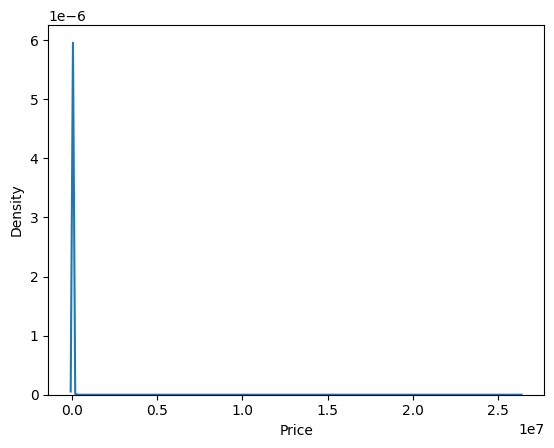

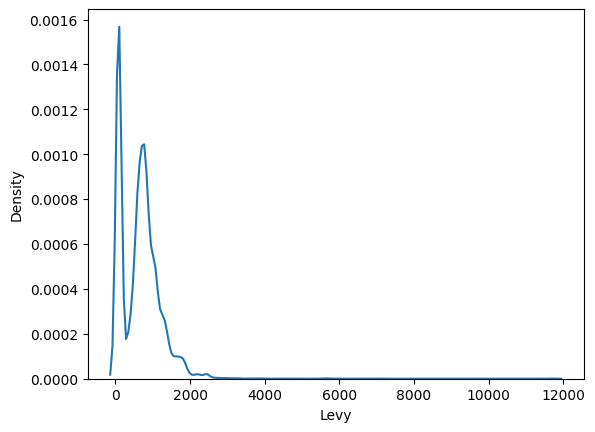

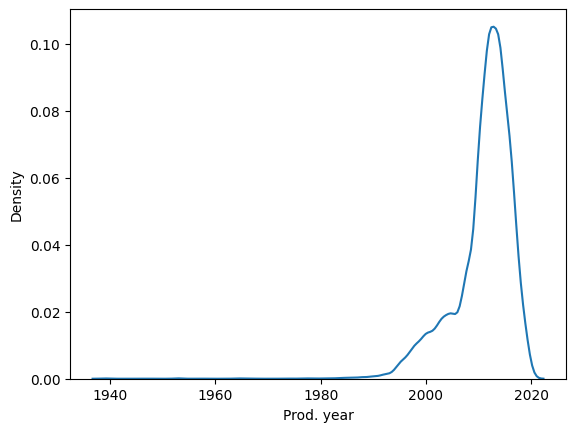

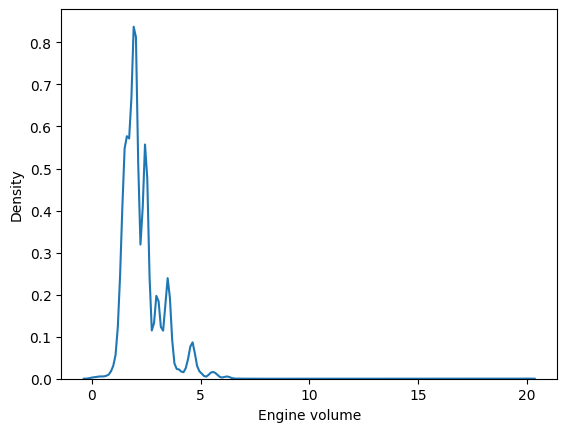

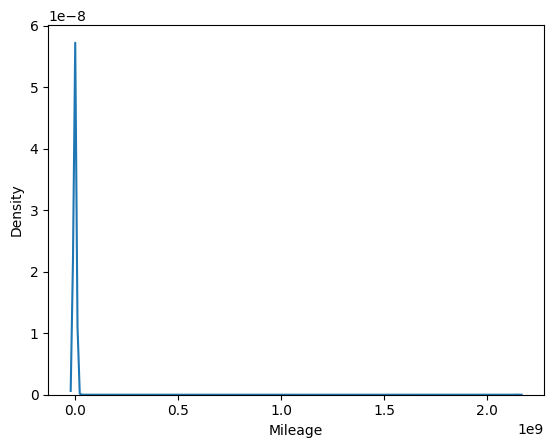

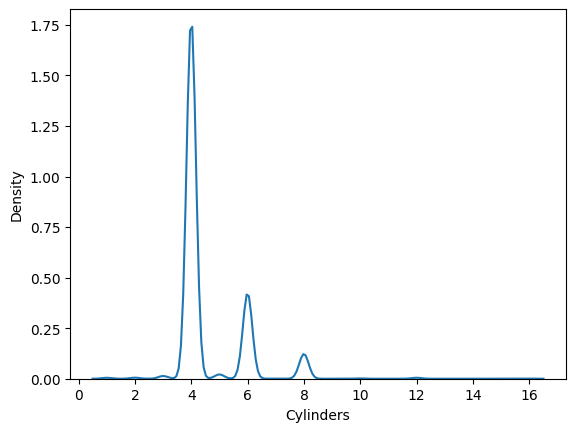

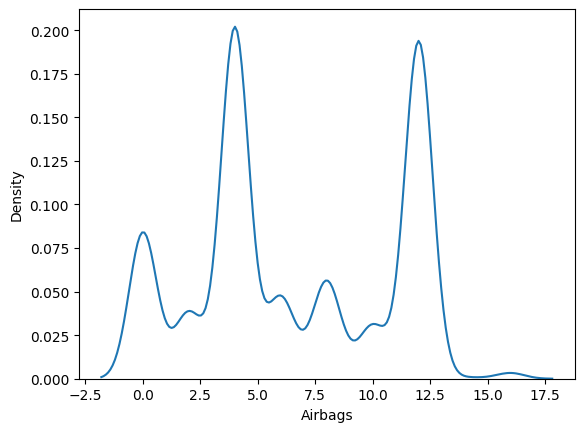

In [120]:
for col in df.select_dtypes('number').columns:
    sns.kdeplot(df[col])
    plt.show()

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Mileage', ylabel='Density'>

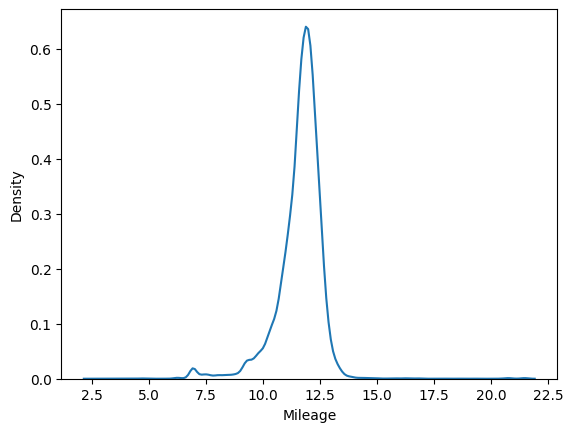

In [121]:
sns.kdeplot(np.log(df['Mileage']))

# 4. Correlations
#### . Numerical Correlations (corr())
#### . Categorical Correlations

<Axes: >

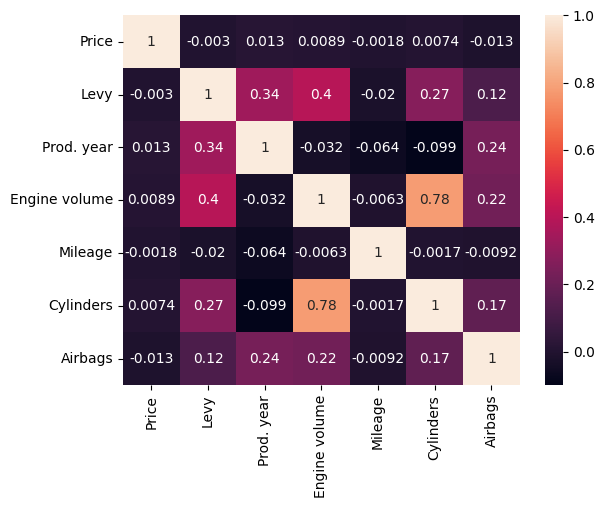

In [122]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True)

# 5. Feature Interactions
#### . Scatter Plots

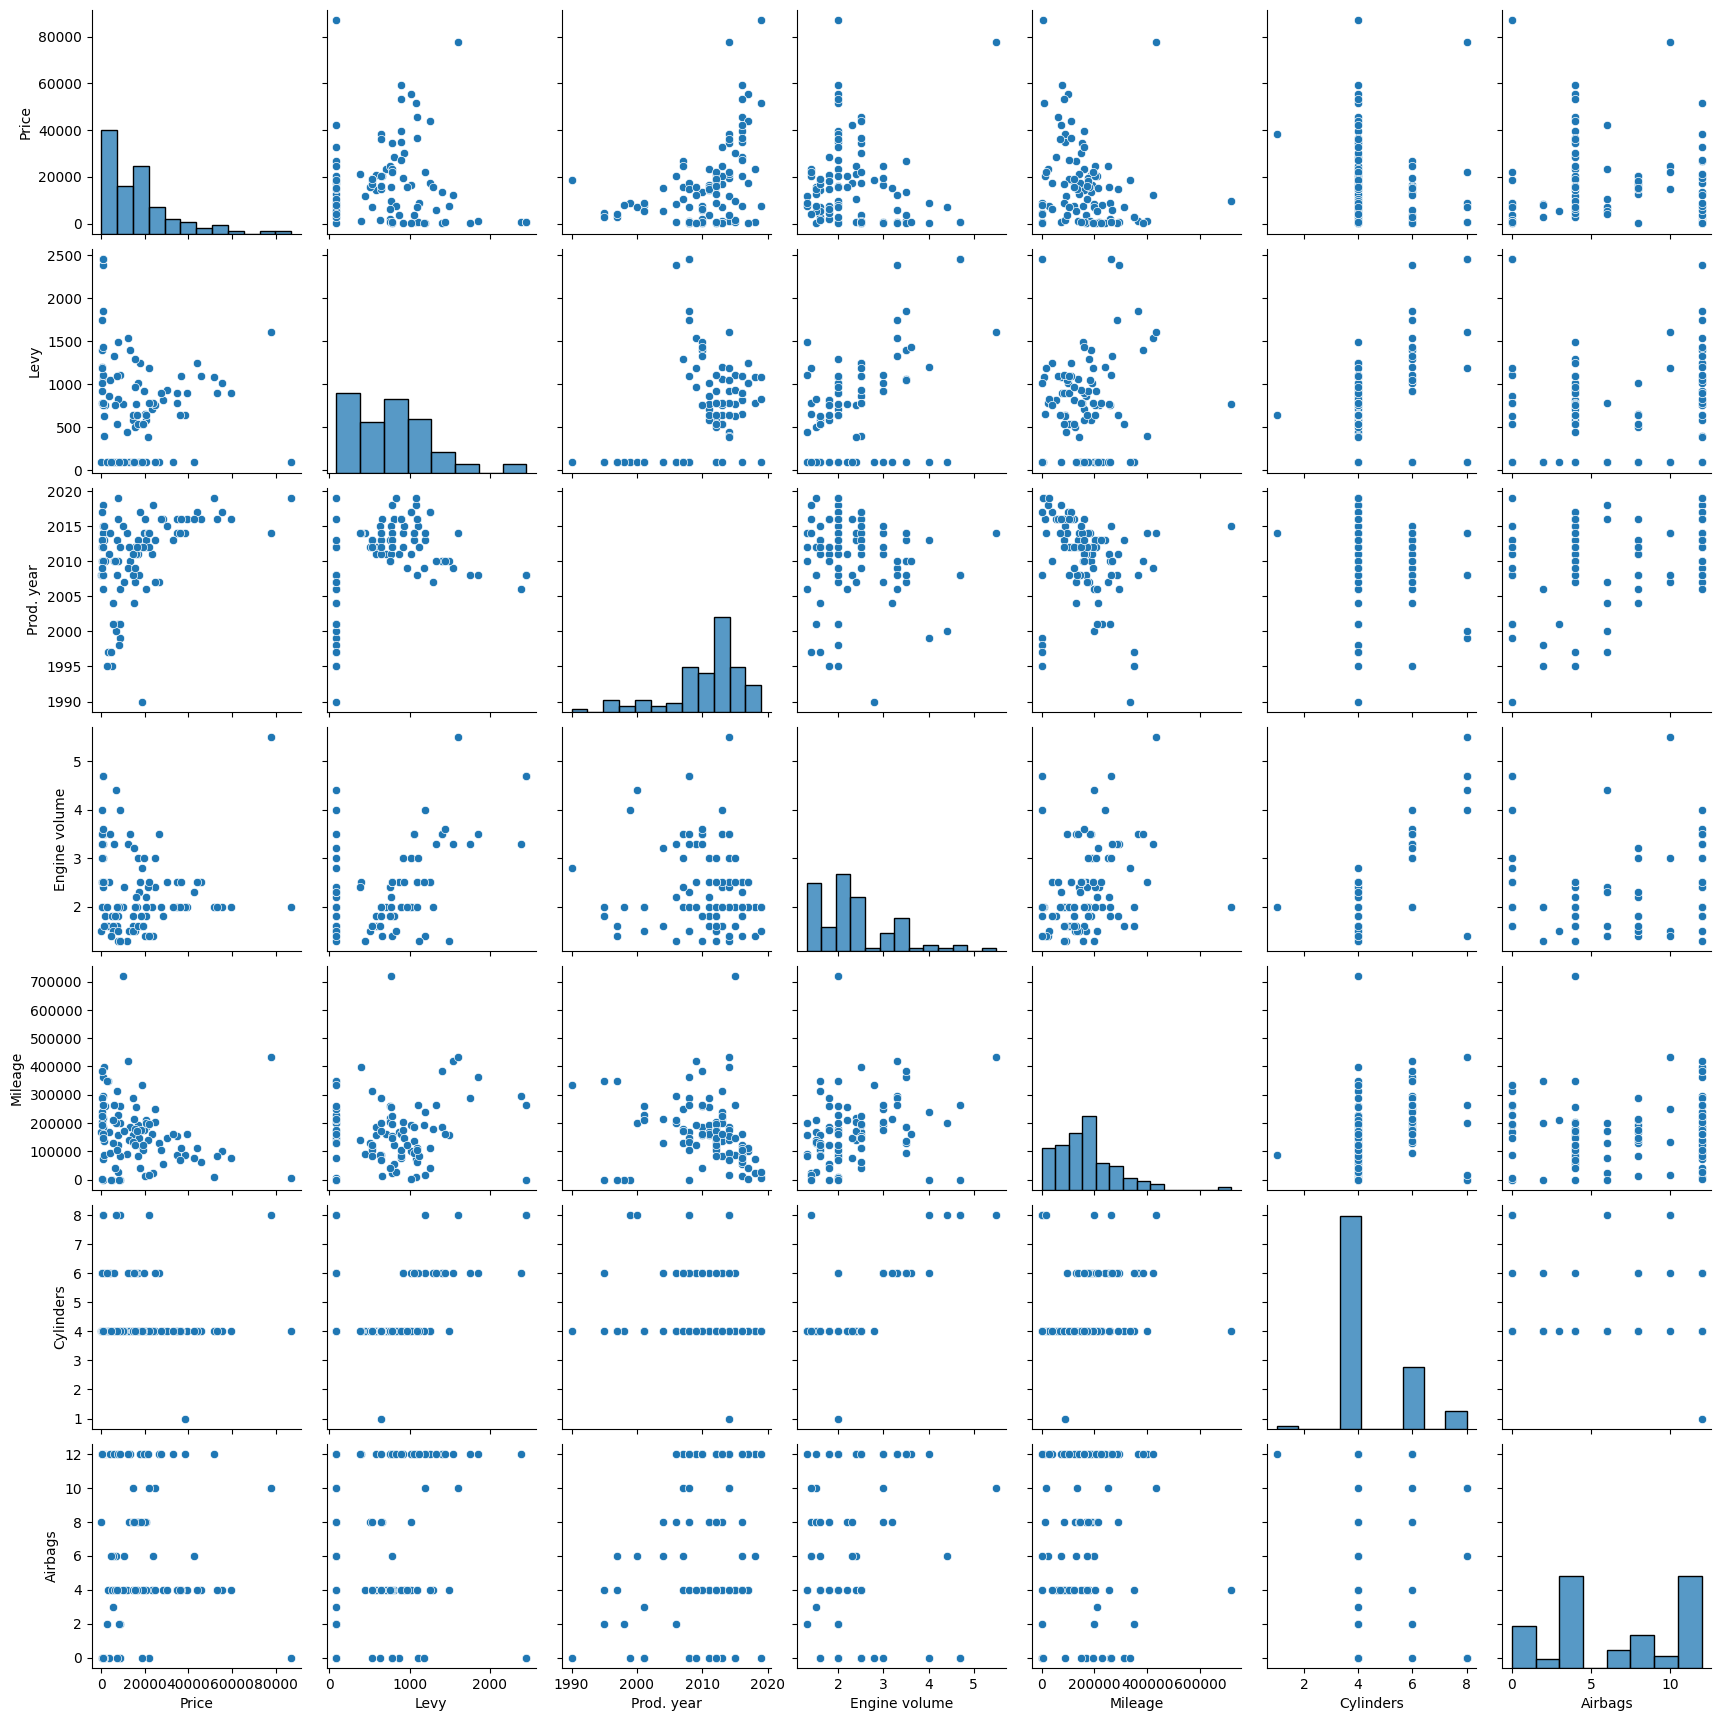

In [123]:
sns.pairplot(df[:100])

<Axes: ylabel='Price'>

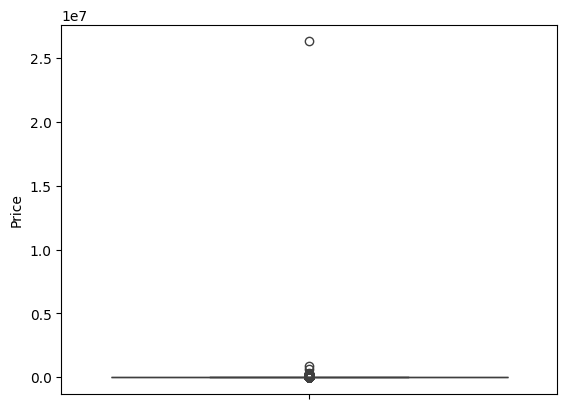

In [124]:
sns.boxplot(df['Price'])

In [125]:
df[df['Price'] > 5e5]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
1225,627220,87.0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,Left wheel,Black,12
8541,872946,2067.0,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8.0,Tiptronic,4x4,Left wheel,Black,0
16983,26307500,87.0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,Left wheel,Blue,0


<Axes: ylabel='Levy'>

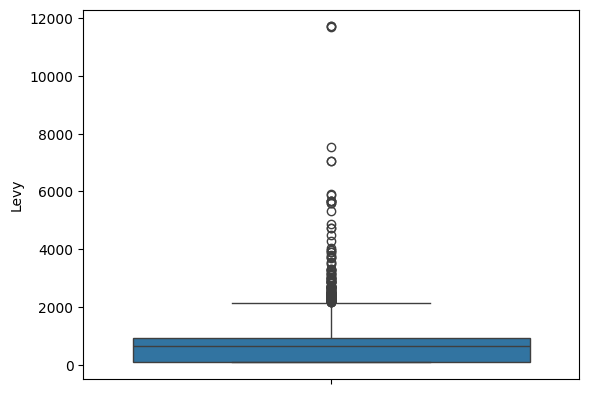

In [126]:
sns.boxplot(df['Levy'])

<Axes: ylabel='Mileage'>

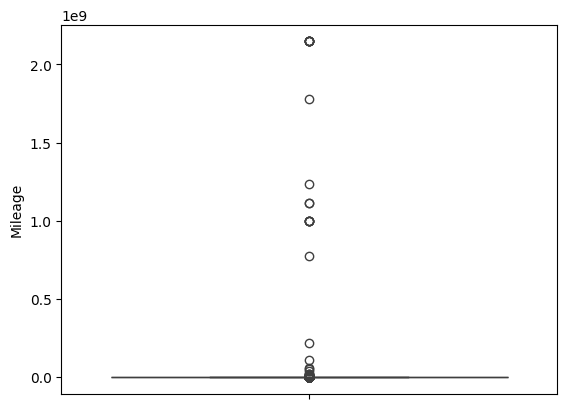

In [127]:
sns.boxplot(df['Mileage'])

### Remove The Outliers

In [131]:
df = preprocessing.clean_outliers(df, ['Price' , 'Mileage' , 'Levy'])

In [133]:
df.shape 

(17021, 16)

# 6. Target Variable Analysis
#### . Distribution of Target Variable (for class imbalance, decide if resampling or weighting is needed)
#### . Relationship with Predictors (scatter plots, box plots against the target)

# 6. Target Variable Analysis
#### . Distribution of Target Variable (for class imbalance, decide if resampling or weighting is needed)
#### . Relationship with Predictors (scatter plots, box plots against the target)

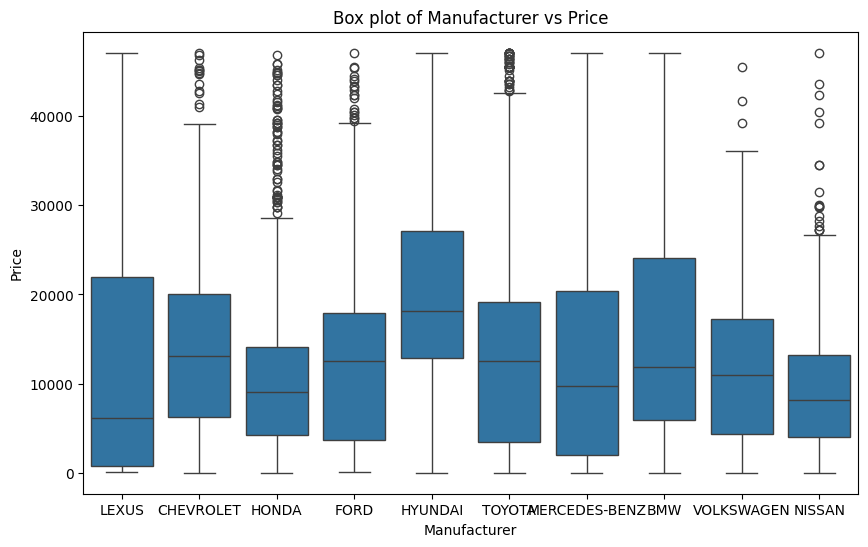

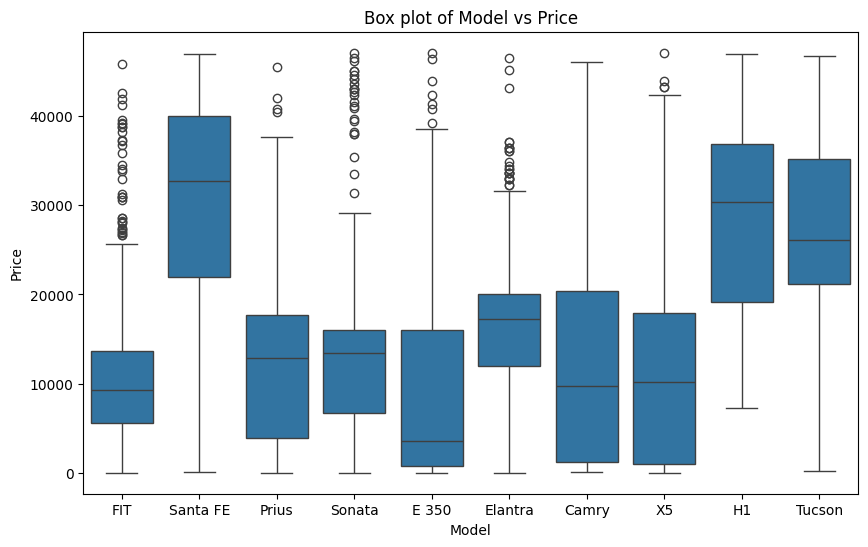

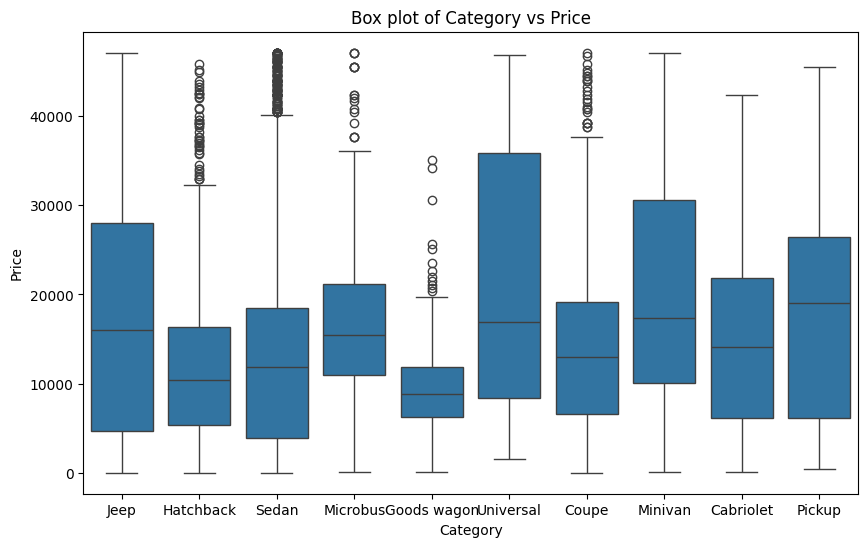

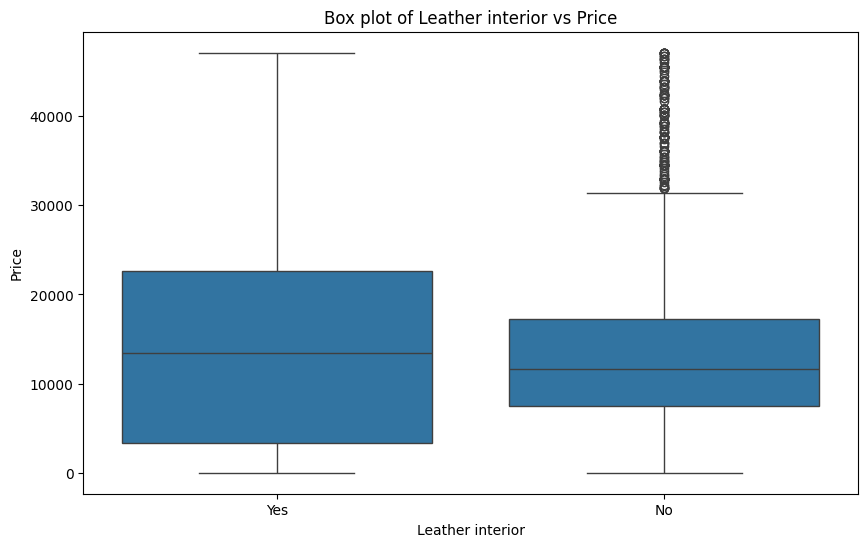

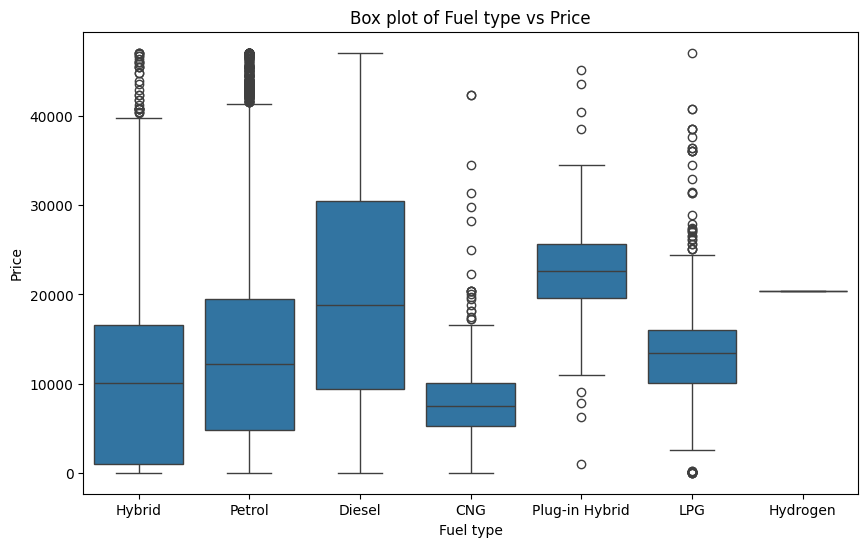

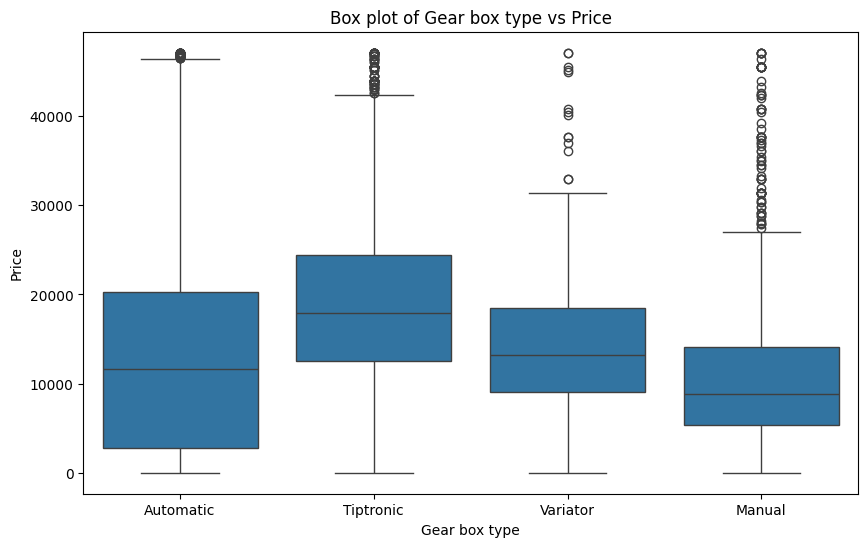

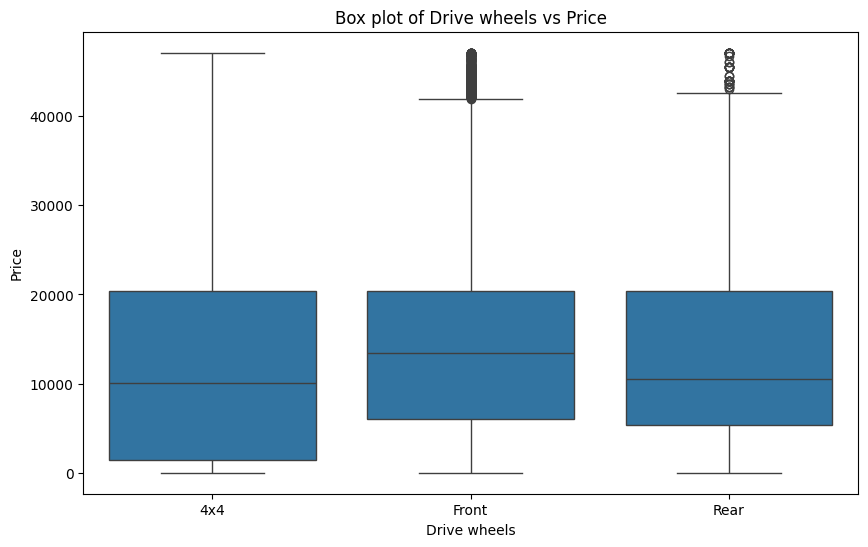

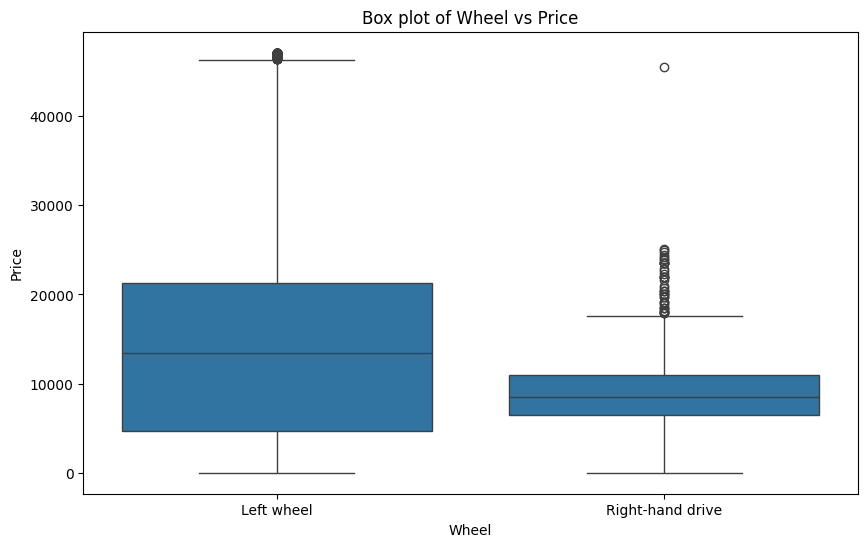

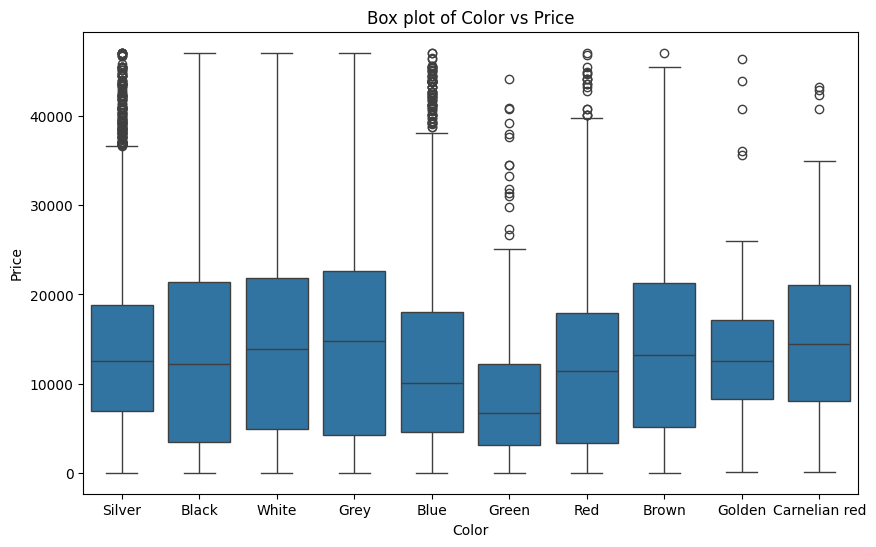

In [93]:
for col in df.select_dtypes('object'):
    top_categories = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_categories)]
    
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filtered_df[col], y=filtered_df['Price'])
    plt.title(f'Box plot of {col} vs Price')

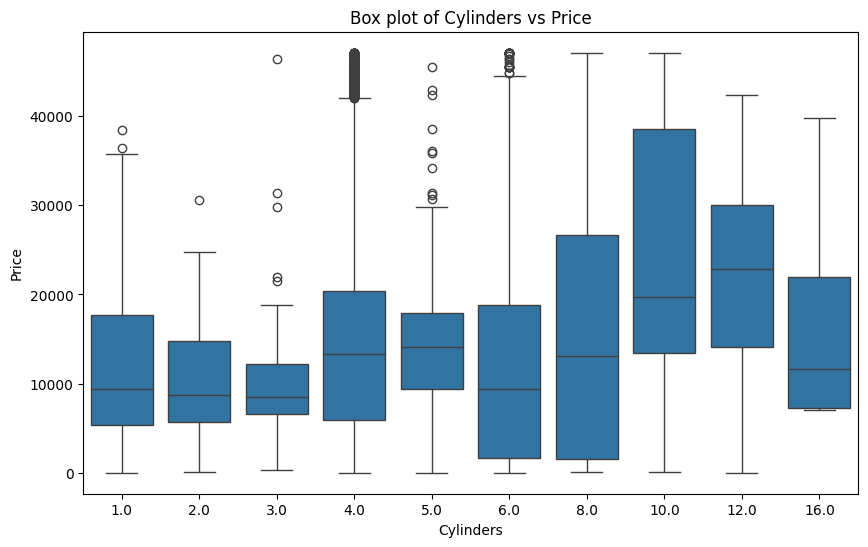

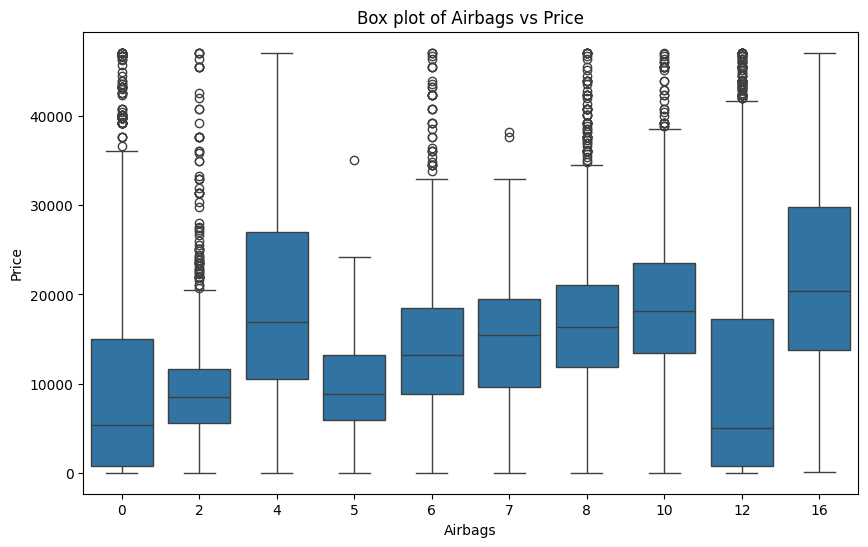

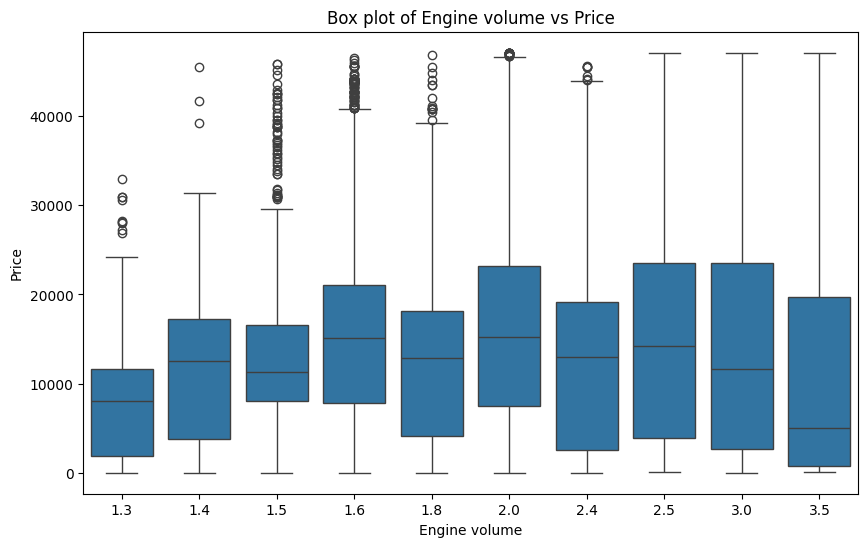

In [94]:
for col in ['Cylinders', 'Airbags', 'Engine volume']:
    top_categories = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_categories)]
    
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filtered_df[col], y=filtered_df['Price'])
    plt.title(f'Box plot of {col} vs Price')
    

### Other notes:
##### We Can do target encoding (mean encoding) for Model, Category, Manufacturer and Fuel Type.